# *🎌 MyAnimeList Top 250 Anime – Web Scraping & Analysis*
This project scrapes the Top 250 anime from MyAnimeList.net, extracting data such as title, rank, score, type, and number of episodes.
It then performs exploratory data analysis (EDA) to uncover insights about anime trends and scoring.


Importing libraries

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [4]:
headers = {
     'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64)'
}

Scrape All Pages (Top 250)

In [5]:
all_data=[]

for offset in range(0, 250, 50):
    url = f"https://myanimelist.net/topanime.php?limit={offset}"
    response = requests.get(url, headers = headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    anime_list = soup.select('tr.ranking-list')

    for anime in anime_list:
        title = anime.find('h3', class_='anime_ranking_h3').text.strip()
        score = anime.find('span', class_='score-label').text.strip()
        rank = anime.find('span', class_='top-anime-rank-text').text.strip()
        info = anime.select_one('div.information').text.strip().replace('\n', ' ')
        
        all_data.append({
            'rank': int(rank),
            'title': title,
            'score': float(score) if score != 'N/A' else None,
            'info': info
        })

    time.sleep(1)

In [6]:
df= pd.DataFrame(all_data)
df.head()

,rank,title,score,info
0,1,Sousou no Frieren,9.30,TV (28 eps) Sep 2023 - Mar 2024 ...
1,2,Fullmetal Alchemist: Brotherhood,9.10,TV (64 eps) Apr 2009 - Jul 2010 ...
2,3,Steins;Gate,9.07,TV (24 eps) Apr 2011 - Sep 2011 ...
3,4,Shingeki no Kyojin Season 3 Part 2,9.05,TV (10 eps) Apr 2019 - Jul 2019 ...
4,5,Gintama°,9.05,TV (51 eps) Apr 2015 - Mar 2016 ...


Splitting data from info column like Type and Episodes.

In [7]:
def parse_type_and_episodes(info):
    try:
        parts = info.split('scored')[0].strip().split('(')
        anime_type = parts[0].strip()
        episodes = parts[1].split()[0] if len(parts) > 1 else None
        return pd.Series([anime_type, int(episodes) if episodes and episodes.isdigit() else None])
    except:
        return pd.Series([None, None])

df[['type', 'episodes']] = df['info'].apply(parse_type_and_episodes)
df.head()


,rank,title,score,info,type,episodes
0,1,Sousou no Frieren,9.30,TV (28 eps) Sep 2023 - Mar 2024 ...,TV,28.0
1,2,Fullmetal Alchemist: Brotherhood,9.10,TV (64 eps) Apr 2009 - Jul 2010 ...,TV,64.0
2,3,Steins;Gate,9.07,TV (24 eps) Apr 2011 - Sep 2011 ...,TV,24.0
3,4,Shingeki no Kyojin Season 3 Part 2,9.05,TV (10 eps) Apr 2019 - Jul 2019 ...,TV,10.0
4,5,Gintama°,9.05,TV (51 eps) Apr 2015 - Mar 2016 ...,TV,51.0


## Visualisation

### Average Score by Anime Type

C:\Users\atewa\AppData\Local\Temp\ipykernel_7708\2079706562.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='type', y='score', palette='magma',legend=True)


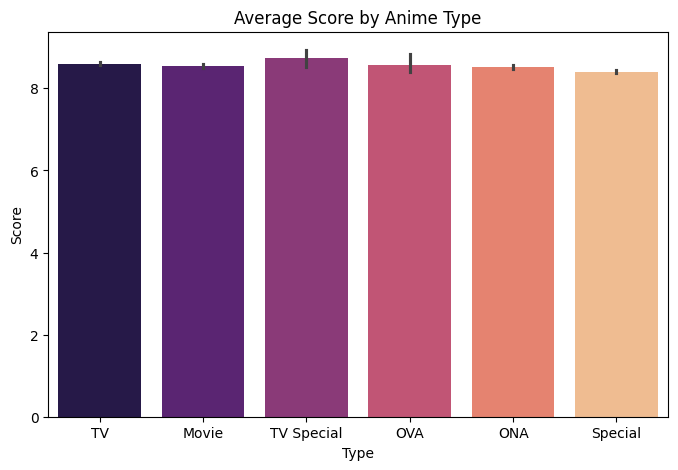

In [8]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='type', y='score', palette='magma',legend=True)
plt.title("Average Score by Anime Type")
plt.ylabel("Score")
plt.xlabel("Type")
plt.show()

### Episode Count vs. Score

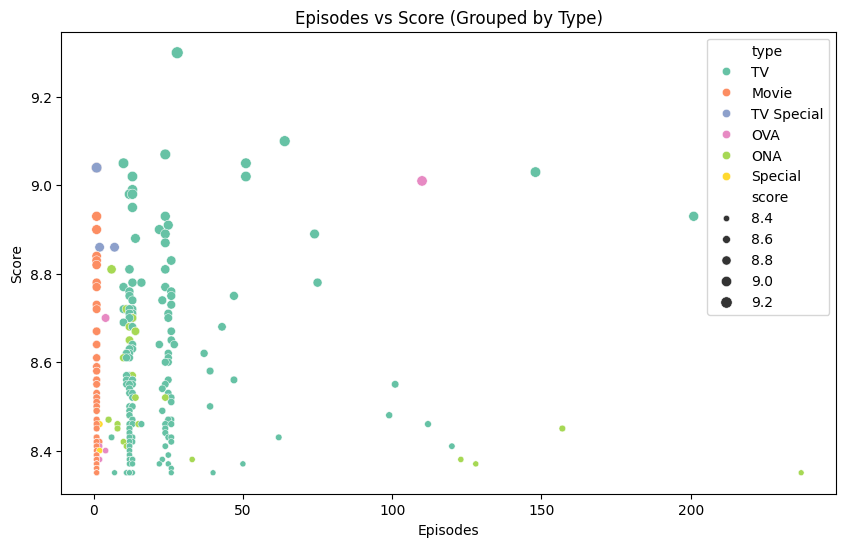

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='episodes', y='score', hue='type', size='score', palette='Set2')
plt.title("Episodes vs Score (Grouped by Type)")
plt.xlabel("Episodes")
plt.ylabel("Score")
plt.show()


### Score by Episode Ranges

C:\Users\atewa\AppData\Local\Temp\ipykernel_7708\4280835732.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='episode_bins', y='score', palette='Blues')


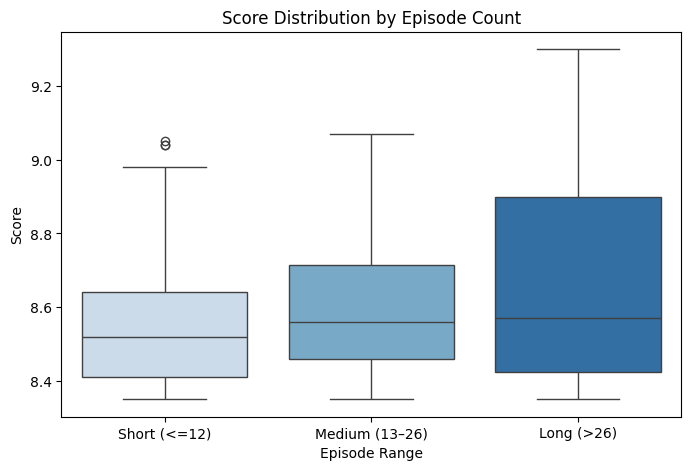

In [10]:
df['episode_bins'] = pd.cut(df['episodes'], bins=[0, 12, 26, 1000],
                            labels=['Short (<=12)', 'Medium (13–26)', 'Long (>26)'])

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='episode_bins', y='score', palette='Blues')
plt.title("Score Distribution by Episode Count")
plt.xlabel("Episode Range")
plt.ylabel("Score")
plt.show()


In [11]:
df.head()

,rank,title,score,info,type,episodes,episode_bins
0,1,Sousou no Frieren,9.30,TV (28 eps) Sep 2023 - Mar 2024 ...,TV,28.0,Long (>26)
1,2,Fullmetal Alchemist: Brotherhood,9.10,TV (64 eps) Apr 2009 - Jul 2010 ...,TV,64.0,Long (>26)
2,3,Steins;Gate,9.07,TV (24 eps) Apr 2011 - Sep 2011 ...,TV,24.0,Medium (13–26)
3,4,Shingeki no Kyojin Season 3 Part 2,9.05,TV (10 eps) Apr 2019 - Jul 2019 ...,TV,10.0,Short (<=12)
4,5,Gintama°,9.05,TV (51 eps) Apr 2015 - Mar 2016 ...,TV,51.0,Long (>26)


In [12]:
df.to_csv(r"C:\Users\atewa\OneDrive\Desktop\DA_Projects\Top 250 anime\myanimelist_top_250.csv",index=False)